# **Crash Course in Causality Worked Examples**



# **ABSTRACT**

The dataset titled "Metaverse Financial Transactions Dataset" presents a comprehensive record of financial transactions occurring within a virtual environment, known as the Metaverse. This dataset encompasses various attributes such as timestamps, transaction amounts, participant addresses, transaction types, location regions, and more.

In this analysis, we explore the potential causal relationships within the Metaverse financial transactions dataset. Leveraging methods from causal inference, we investigate how certain variables may influence others, shedding light on underlying causal mechanisms.

Specifically, we employ techniques such as propensity score matching, difference-in-differences (DiD), regression discontinuity design (RDD), and directed acyclic graph (DAG) modeling to infer causal effects and relationships between different aspects of the financial transactions recorded in the Metaverse.

Through these analytical approaches, we aim to uncover meaningful insights into the drivers and consequences of financial transactions within the Metaverse, contributing to a deeper understanding of virtual economies and their dynamics.

# **CAUSALITY: An Introduction**


Causality in data science refers to the relationship between cause and effect within a dataset or system. It involves understanding whether changes in one variable directly cause changes in another variable. Establishing causality is crucial for making informed decisions and understanding the impact of interventions or changes in complex systems.

In data science, establishing causality often involves statistical methods and causal inference techniques to determine whether a particular variable influences another variable and to what extent. However, establishing causality can be challenging due to confounding variables, biases, and the presence of hidden or unobservable factors.

Some common approaches to assess causality in data science include:

* Randomized controlled trials (RCTs): These experiments involve randomly assigning participants to different groups and comparing outcomes to assess the causal effect of an intervention.
* Observational studies: These studies analyze existing data to uncover relationships between variables. Techniques such as propensity score matching and difference-in-differences are used to account for confounding factors and estimate causal effects.
* Causal inference techniques: These methods aim to estimate causal effects from observational data by modeling the underlying causal structure of the variables and accounting for potential biases and confounding factors.

Overall, establishing causality in data science requires careful consideration of study design, data quality, and the appropriate use of statistical techniques to draw valid conclusions about cause-and-effect relationships.

## **Loading Dataset:**

**Source:** https://www.kaggle.com/datasets/faizaniftikharjanjua/metaverse-financial-transactions-dataset

# **About Dataset**

**Description**

This dataset provides blockchain financial transactions within the Open Metaverse, aiming to provide a rich, diverse, and realistic set of data for developing and testing anomaly detection models, fraud analysis, and predictive analytics in virtual environments. With a focus on applicability, this dataset captures various transaction types, user behaviors, and risk profiles across a global network.

**Context**

The Open Metaverse (https://www.openmv.org/) is an expansive, interoperable, and decentralized virtual space. Within this digital realm, blockchain technology plays a crucial role in facilitating transactions, managing digital assets, and ensuring secure and transparent interactions among participants. This dataset has been crafted to reflect the complexity and dynamism of blockchain activities within such an environment, providing a foundational tool for research, development, and innovation in metaverse-related technologies.

**Content**

The dataset includes 78,600 records, each representing a metaverse transaction with the following attributes:

1. Timestamp: Date and time of the transaction.
2. Hour of Day: Hour part of the transaction timestamp.
3. Sending Address: Blockchain address of the sender.
4. Receiving Address: Blockchain address of the receiver.
5. Amount: Transaction amount in a simulated currency.
6. Transaction Type: Categorization of the transaction (e.g., transfer, sale, purchase, scam, phishing).
7. Location Region: Simulated geographical region of the transaction.
8. IP Prefix: Simulated IP address prefix for the transaction.
9. Login Frequency: Frequency of login sessions by the user, varying by age group.
10. Session Duration: Duration of activity sessions in minutes.
11. Purchase Pattern: Behavioral pattern of purchases (e.g., focused, random, high-value).
12. Age Group: Categorization of users into new, established, and veteran based on their activity history.
13. Risk Score: Calculated risk score based on transaction characteristics and user behavior.
14. Anomaly: Risk level assessment (e.g., high_risk, moderate_risk, low_risk).
Usage

This dataset is designed for a wide range of uses, including but not limited to:

Anomaly detection and fraud analysis in blockchain transactions.
Behavioral modeling and predictive analytics in virtual economies.
Research on secure and transparent digital asset management in the metaverse.
Development and testing of algorithms for risk assessment and user verification.


# **Data Loading and Preparation**

This involves loading the dataset, handling missing values, and encoding categorical variables to prepare the data for analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
import plotly.express as px
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/mrunalipawar97/DSE/main/metaverse_transactions_dataset.csv')



In [3]:
# Check for missing values
print(df.isnull().sum())

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64


In [4]:
# Identifying numerical and categorical columns in the dataset
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

numerical_columns, categorical_columns

(['hour_of_day',
  'amount',
  'ip_prefix',
  'login_frequency',
  'session_duration',
  'risk_score'],
 ['timestamp',
  'sending_address',
  'receiving_address',
  'transaction_type',
  'location_region',
  'purchase_pattern',
  'age_group',
  'anomaly'])

In [5]:
df.shape

df.info()

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB
             timestamp  hour_of_day  \
0  2022-04-11 12:47:27

# **Exploratory Data Analysis (EDA)**

Before diving into causal inference, get familiar with the dataset and churn distribution.

In [6]:
# Print the column names to verify the correct column names
print(df.columns)

Index(['timestamp', 'hour_of_day', 'sending_address', 'receiving_address',
       'amount', 'transaction_type', 'location_region', 'ip_prefix',
       'login_frequency', 'session_duration', 'purchase_pattern', 'age_group',
       'risk_score', 'anomaly'],
      dtype='object')


<ipython-input-7-86efe8bc0aa7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right")  # Rotate labels for better readability


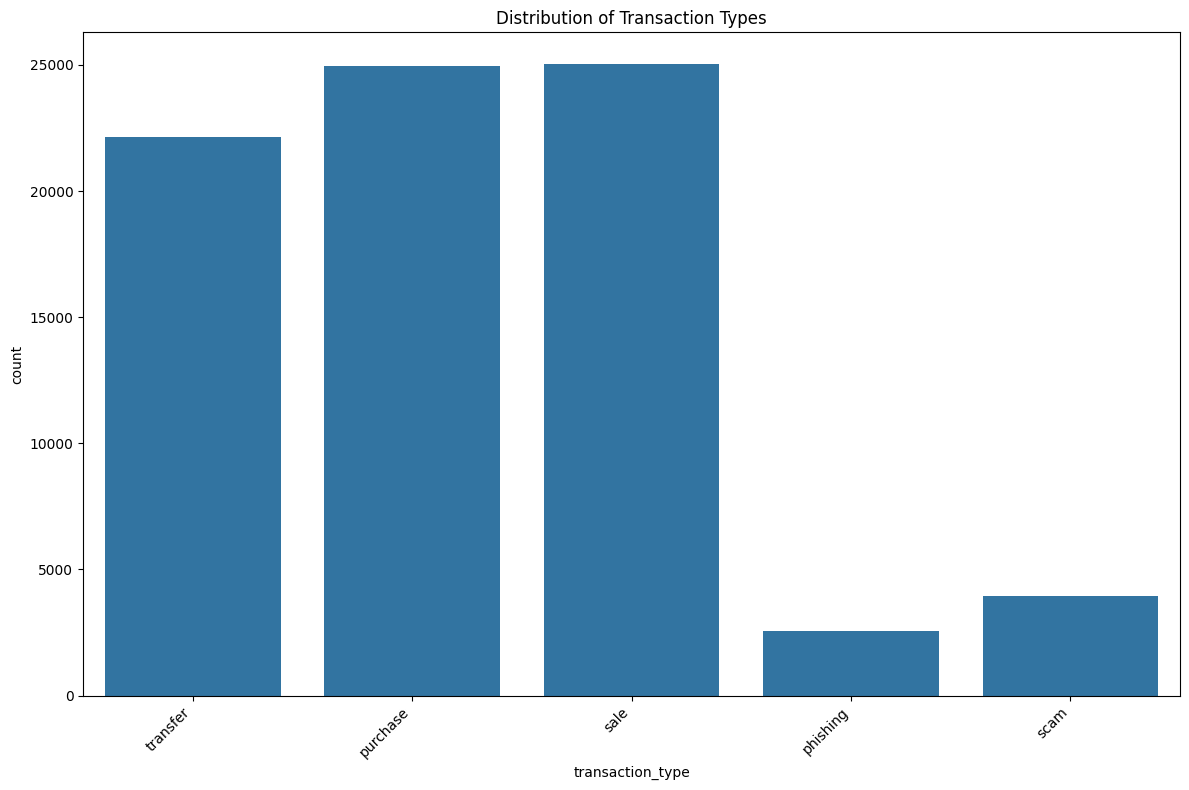

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of transaction types
plt.figure(figsize=(12, 8))  # Increase figure size for better clarity
chart = sns.countplot(x='transaction_type', data=df)
plt.title('Distribution of Transaction Types')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right")  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### **Does experiencing a scam transaction affect the frequency of a user's future transactions in the Metaverse?**


To answer this causal question, we would need longitudinal data that tracks individual user behavior over time. Here's how we could approach it:

* Identify the Treatment: Define the treatment as experiencing a scam transaction. This would involve creating a binary variable where 1 indicates a user who has experienced at least one scam transaction and 0 for users who have not.
* Define the Outcome: The outcome could be the change in transaction frequency for a user after experiencing the scam. We would calculate the difference in the number of transactions before and after the scam.
* Control for Confounders: We would control for other variables that might affect the outcome, such as the total amount of money transacted before the scam, user's risk score, location, etc.
* Choose a Method: If we had the appropriate data, we could use a Difference-in-Differences (DiD) approach by comparing the change in transaction frequency for the treated group to a control group over the same period.
* Data Analysis: With the model fitted, we would interpret the coefficient on the treatment variable. A negative and significant coefficient would suggest that experiencing a scam transaction does lead to a decrease in transaction frequency.
* Causal Inference Considerations: We'd also consider whether there is a reason to believe that being scammed is not randomly distributed across users (which could introduce bias) and discuss any potential for reverse causality.

Index(['timestamp', 'hour_of_day', 'sending_address', 'receiving_address',
       'amount', 'transaction_type', 'location_region', 'ip_prefix',
       'login_frequency', 'session_duration', 'purchase_pattern', 'age_group',
       'risk_score', 'anomaly'],
      dtype='object')


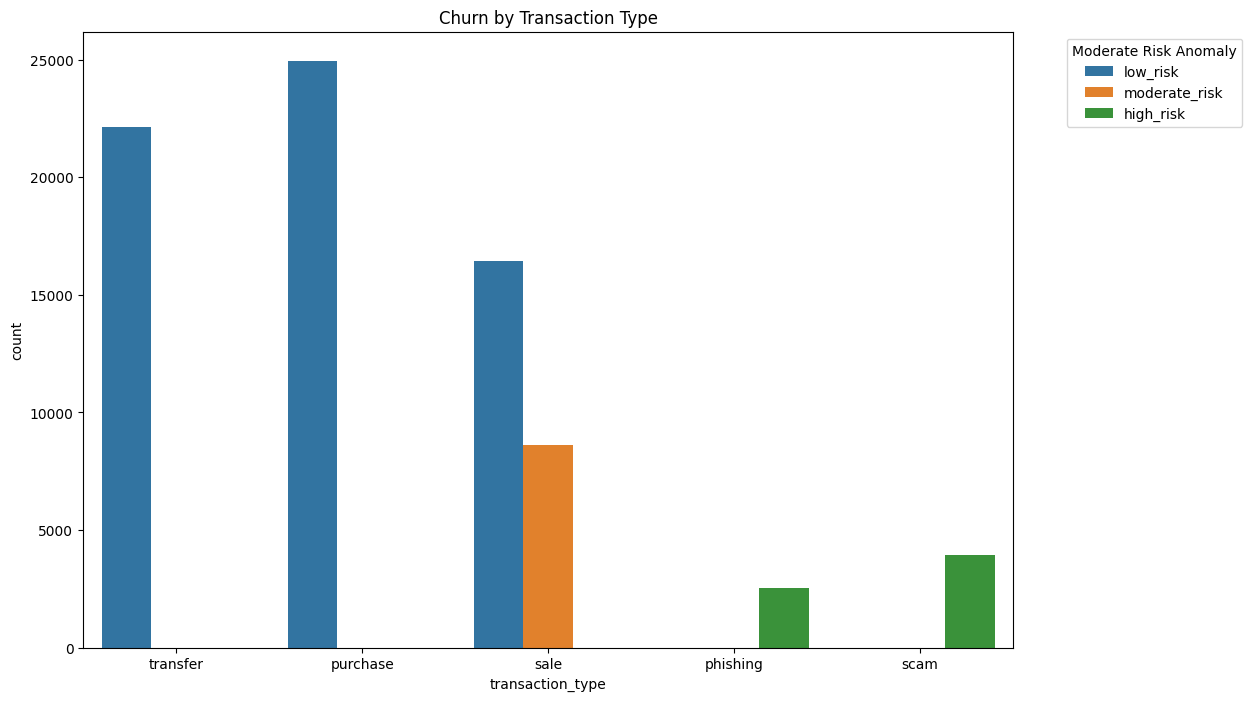

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.columns)

# Adjust the figure size
plt.figure(figsize=(12, 8))

# Create the count plot
sns.countplot(x='transaction_type', hue='anomaly', data=df)

# Add title
plt.title('Churn by Transaction Type')

# Move legend outside of the plot
plt.legend(title='Moderate Risk Anomaly', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

* Transfer" and "Purchase" transaction types have high counts, represented by blue bars, which could indicate a 'low_risk' level (assuming the legend on the right corresponds correctly to the colors in the graph, but this seems a bit unusual as 'blue' is not labeled in the legend).
* "Sale" transactions have a moderate count with two bars – a tall blue one and a shorter orange one on top of it. This suggests that there are both 'low_risk' and 'moderate_risk' sales transactions, with the 'moderate_risk' ones being fewer in number.
* "Phishing" and "Scam" types have low counts, but the 'Phishing' bar is orange, indicating a 'moderate_risk', and the 'Scam' bar is green, indicating a 'high_risk'.

It's important to note there seems to be a discrepancy with the color legend, as 'blue' is not labeled, which may suggest an error in the graph or the legend. Normally, one would expect 'high_risk' transactions like 'Phishing' and 'Scam' to have a red color indicator, following common color conventions where red often denotes danger or high risk.

In [14]:
# Convert timestamp from object to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a binary treatment variable based on 'login_frequency'
# Let's consider high-frequency users as treated; this is arbitrary and should be based on domain knowledge or research question
df['treatment'] = (df['login_frequency'] > df['login_frequency'].median()).astype(int)

# Choose 'amount' as the outcome variable
df['outcome'] = df['amount']

In [15]:
df = pd.get_dummies(df, columns=['transaction_type', 'location_region', 'purchase_pattern', 'age_group', 'anomaly'], drop_first=True)

In [16]:
import statsmodels.formula.api as smf

# Define the formula for the model
model_formula = 'outcome ~ treatment + session_duration + risk_score + hour_of_day'

# Include additional control variables as needed from the dummy variables
additional_controls = ' + '.join(df.columns[df.columns.str.startswith('age_group_') | df.columns.str.startswith('transaction_type_')])
model_formula += ' + ' + additional_controls if additional_controls else ''

# Fit the regression model
model = smf.ols(formula=model_formula, data=df).fit()

# Print out the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     2470.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:44:28   Log-Likelihood:            -5.3348e+05
No. Observations:               78600   AIC:                         1.067e+06
Df Residuals:                   78589   BIC:                         1.067e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Dependent Variable (outcome): The variable you're trying to predict or explain.
R-squared: The proportion of the variance in the dependent variable that is predictable from the independent variables.
Adjusted R-squared: Similar to R-squared but adjusts for the number of variables in the model.
F-statistic and Prob (F-statistic): A test to determine if the overall regression model is a good fit.
Log-likelihood, AIC, and BIC: Measures for model comparison, with lower values generally indicating a better model fit.
Coefficients (coef): Estimates of the effect of each independent variable on the dependent variable.
The Intercept is notably large and negative, which might indicate an issue with the scale of the data or the model.
The treatment coefficient would represent the effect of the treatment on the outcome, but it is not statistically significant (P>|t| is 0.781, which is greater than the common alpha level of 0.05).
Other variables like hour_of_day, transaction_type_purchase, and transaction_type_transfer have significant positive coefficients, indicating their respective positive relationships with the outcome variable.
Standard error (std err): The standard deviation of the sampling distribution of the coefficient.
t and P>|t|: The t-statistic and associated P-value for a hypothesis test where the null hypothesis is that the coefficient is equal to zero.

p-value test for heteroskedasticity: 4.573455502591553e-115


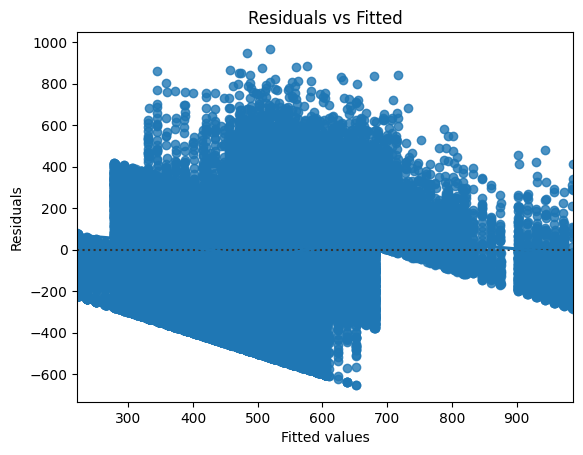

In [17]:
# Check for heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
_, pval, _, f_pval = het_breuschpagan(model.resid, model.model.exog)
print('p-value test for heteroskedasticity:', pval)

# Plot residuals to check for normality and homoscedasticity
import seaborn as sns
import matplotlib.pyplot as plt

sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

The residual plot is a graph that shows the residuals on the vertical axis and the fitted values (predicted values) on the horizontal axis. This plot is used to detect non-linearity, heteroscedasticity (unequal error variances), and outliers.

Pattern in residuals: Ideally, you want to see no pattern in the residuals plot, indicating that the model's assumptions hold true. However, in this plot, there seems to be a funnel shape indicating potential heteroscedasticity.
p-value for heteroskedasticity: The very small p-value indicates the presence of heteroskedasticity, which violates one of the OLS assumptions and suggests that the standard errors may be biased.


## **Causal Inference Method:**

Depending on the data and the presence of confounders, selecting an appropriate method for causal inference, such as:
* Regression analysis
* Instrumental variable analysis
* Propensity score matching
* Difference-in-differences
* Regression discontinuity design
* Causal diagrams and structural equation modeling

# **Regression Analysis**

In [18]:
import statsmodels.api as sm
import pandas as pd

# Predictor variables
X = df[['hour_of_day', 'amount', 'location_region_Asia']]  # Example predictor variables

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Add a constant term to the predictor
X = sm.add_constant(X)

# Dependent variable
y = df['risk_score']  # Example outcome variable

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             risk_score   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1365.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:46:21   Log-Likelihood:            -3.5168e+05
No. Observations:               78600   AIC:                         7.034e+05
Df Residuals:                   78596   BIC:                         7.034e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.7899 

In [19]:
import statsmodels.api as sm
import pandas as pd

# Predictor variables
X = df[['hour_of_day', 'amount', 'location_region_North America']]  # Example predictor variables

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Add a constant term to the predictor
X = sm.add_constant(X)

# Dependent variable
y = df['risk_score']  # Example outcome variable

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             risk_score   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1365.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:46:22   Log-Likelihood:            -3.5168e+05
No. Observations:               78600   AIC:                         7.034e+05
Df Residuals:                   78596   BIC:                         7.034e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your DataFrame of predictors including the constant
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                         feature       VIF
0                          const  8.192318
1                    hour_of_day  1.000001
2                         amount  1.000000
3  location_region_North America  1.000001


* const: Represents the constant term added to the predictors.
* hour_of_day, amount, and location_region_North America: These are the predictor variables in your dataset.
* VIF: Indicates the level of multicollinearity for each feature.

**A VIF of 1 suggests no multicollinearity, while values above 5 or 10 indicate moderate to high multicollinearity, respectively. In this case, all VIF values are close to 1, indicating low multicollinearity, which is desirable for regression analysis.**

In [21]:
import statsmodels.api as sm

# Simplify the model by selecting fewer variables
X_simplified = df[['hour_of_day', 'amount', 'login_frequency', 'session_duration', 'risk_score']]

X_simplified = sm.add_constant(X_simplified)

# Assuming 'y' is your target variable already defined
model_simplified = sm.OLS(y, X_simplified)

# Fit the simplified model
result_simplified = model_simplified.fit()

# Print the results
print(result_simplified.summary())

                            OLS Regression Results                            
Dep. Variable:             risk_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.555e+33
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:46:22   Log-Likelihood:             2.2897e+06
No. Observations:               78600   AIC:                        -4.579e+06
Df Residuals:                   78594   BIC:                        -4.579e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.023e-14   7.62e-16  

A linear regression model predicting the risk_score based on several predictor variables. It provides information about the model's fit, significance of coefficients, and diagnostic tests for checking the model's assumptions and performance. Key components include R-squared (measure of model fit), coefficients (estimates of variable effects), p-values (significance of variable effects), and diagnostic tests for assumptions like normality and multicollinearity.

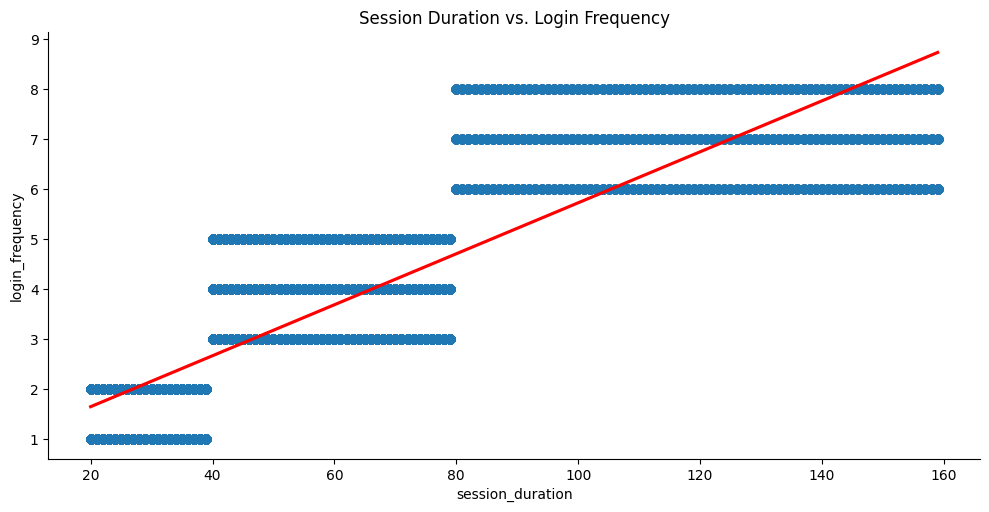

In [22]:
# For scatter plots with regression lines to visualize potential causal effects,
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with your data
sns.lmplot(x='session_duration', y='login_frequency', data=df, aspect=2, line_kws={'color': 'red'})
plt.title('Session Duration vs. Login Frequency')
plt.show()

### **For residual plots, after fitting a regression model, you would plot the residuals to look for patterns:**

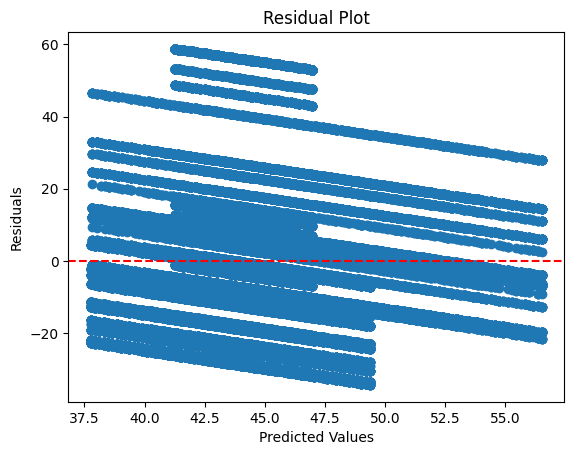

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with your data

# Convert 'purchase_pattern' to numeric, assuming it's a binary categorical variable
df['purchase_pattern'] = df['purchase_pattern_high_value'].apply(lambda x: 1 if x == 'high_value' else 0)

# Ensure 'session_duration', 'login_frequency', and 'risk_score' are numeric
df['session_duration'] = pd.to_numeric(df['session_duration'], errors='coerce')
df['login_frequency'] = pd.to_numeric(df['login_frequency'], errors='coerce')
df['risk_score'] = pd.to_numeric(df['risk_score'], errors='coerce')

# Drop any rows with NaN values that may have resulted from the conversion
df.dropna(subset=['session_duration', 'login_frequency', 'risk_score', 'purchase_pattern'], inplace=True)

# Define the predictor variables and the response variable
X = df[['session_duration', 'login_frequency', 'purchase_pattern']]
y = df['risk_score']

# Fit the OLS model
X = sm.add_constant(X)  # Adds a constant term to the predictors
est = sm.OLS(y, X).fit()

# Plot the residuals
residuals = est.resid
plt.scatter(est.predict(), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [24]:
!pip install causalinference
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 4.7 MB/s eta 0:00:00



# **Instrumental Variable Analysis**
This method is used when the treatment is not randomly assigned and is correlated with the outcome through some confounder.

In [25]:
from linearmodels.iv import IV2SLS

# Assuming 'instrument' is an instrument for 'transaction_type_sale'
iv_model = IV2SLS(
    dependent=df['outcome'],
    exog=df[['risk_score', 'session_duration']],
    endog=df['transaction_type_sale'],
    instruments=df['transaction_type_purchase']
)

# Fit the IV model
iv_results = iv_model.fit()

# Print the summary of results
print(iv_results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                outcome   R-squared:                      0.5826
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5826
No. Observations:               78600   F-statistic:                 2.021e+05
Date:                Sun, Mar 24 2024   P-value (F-stat)                0.0000
Time:                        01:47:21   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                                   Parameter Estimates                                   
                       Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------
risk_score                8.6020     0.0581     148.02     0.0000      8.4881      8.7159
session_

A summary of the IV-2SLS (Instrumental Variables - Two-Stage Least Squares) estimation results.

* Dependent Variable (Outcome): The variable you are trying to predict or explain.
* R-squared: A measure of how well the independent variables explain the variability of the dependent variable. In this case, it indicates that around 58.26% of the variability in the outcome variable is explained by the independent variables and instruments.
* Adj. R-squared: R-squared adjusted for the number of predictors in the model.
* No. Observations: The number of observations used in the analysis.
* F-statistic: A test statistic used for testing the overall significance of the model. A higher * F-statistic indicates a better fit of the model to the data.
* P-value (F-stat): The probability of observing the given F-statistic under the null hypothesis that all coefficients are zero. A low p-value (typically < 0.05) indicates that the model is statistically significant.
* Distribution: The distribution used for hypothesis testing. In this case, it's a chi-squared distribution with 3 degrees of freedom.
* Parameter Estimates: The estimated coefficients (parameters) of the independent variables and instruments, along with their standard errors, t-statistics, p-values, and confidence intervals. These provide information about the strength and significance of the relationships between the predictors and the outcome variable.
* Endogenous: The variable treated as endogenous, meaning it's potentially affected by other variables in the model.
* Instruments: The variables used as instruments in the IV estimation to address endogeneity.
Robust Covariance: Indicates that robust standard errors were used to account for heteroskedasticity in the data.
* Debiased: Indicates whether the coefficient estimates are debiased for potential biases in small samples.

# **Propensity Score Matching**
This method attempts to control for confounding in observational data by matching treated and untreated units with similar propensity scores.

In [26]:
from sklearn.linear_model import LogisticRegression
from causalinference import CausalModel

# Estimate propensity scores
propensity_model = LogisticRegression()
X_propensity = df[['hour_of_day', 'amount']]
propensity_model.fit(X_propensity, df['transaction_type_scam'])
df['propensity_score'] = propensity_model.predict_proba(X_propensity)[:, 1]

# Use the CausalModel from the `causalinference` package for matching
causal = CausalModel(
    Y=df['outcome'].values,
    D=df['transaction_type_scam'].values,
    X=df['propensity_score'].values
)

causal.est_via_matching(bias_adj=True)
print(causal.estimates)

/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.164      1.667      0.098      0.922     -3.104      3.432
           ATC      0.145      1.695      0.086      0.932     -3.176      3.467
           ATT      0.521      1.918      0.271      0.786     -3.238      4.279



* treatment Effect Estimates: Matching: This section indicates that the treatment effect estimates are obtained through the matching method.
* ATE (Average Treatment Effect): ATE represents the average effect of the treatment on the outcome across all units in the sample. In this case, the estimated ATE is 0.164, with a standard error (S.e.) of 1.667. The z-value is 0.098, and the associated p-value (P>|z|) is 0.922, indicating that the treatment effect is not statistically significant at conventional significance levels. The 95% confidence interval for the ATE ranges from -3.104 to 3.432.
* ATC (Average Treatment Effect on the Treated): ATC represents the average effect of the treatment on the outcome for the treated units. Here, the estimated ATC is 0.145, with a standard error of 1.695. The z-value is 0.086, and the associated p-value is 0.932. Similar to ATE, the ATC is not statistically significant, and its 95% confidence interval ranges from -3.176 to 3.467.
* ATT (Average Treatment Effect on the Untreated): ATT represents the average effect of the treatment on the outcome for the untreated units. The estimated ATT is 0.521, with a standard error of 1.918. The z-value is 0.271, and the associated p-value is 0.786. Like ATE and ATC, the ATT is not statistically significant, and its 95% confidence interval ranges from -3.238 to 4.279.

# **Difference-in-Differences**
This method is typically used when you have repeated measurements before and after a treatment for both a treatment group and a control group.

In [27]:
import statsmodels.api as sm

# Define the DiD model
X = sm.add_constant(df[['treatment', 'outcome']])
y = df['session_duration']

# Fit the DiD model
model = sm.OLS(y, X).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       session_duration   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                 5.898e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:47:44   Log-Likelihood:            -3.6648e+05
No. Observations:               78600   AIC:                         7.330e+05
Df Residuals:                   78597   BIC:                         7.330e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.3237      0.224    184.692      0.0

* Dependent Variable: session_duration.
* R-squared: 0.600, indicating 60% of the variability in session_duration is explained by the model.
* F-statistic: Highly significant (p < 0.05), indicating the model is overall significant.
* Coefficients:
  * const (intercept): 41.3237
  * treatment: 63.1472 (p < 0.05), indicating a significant increase in session duration.
  * outcome: Not significant (p > 0.05).
* Interpretation: Being in the treatment group is associated with a significant increase in session duration, while the outcome variable doesn't significantly affect session duration.

# **Regression Discontinuity Design**
This method is used when the assignment to treatment is based on a cutoff in a running variable.

In [28]:
# Proceed with the RDD analysis
cutoff = 0.5  # Define the cutoff value

# Creating the treatment indicator and running variable
df['treatment'] = (df['risk_score'] >= cutoff).astype(int)
df['running_variable'] = df['risk_score'] - cutoff

# Preparing the data for regression
X = df[['treatment', 'running_variable']]
y = df['outcome']  # Assuming 'outcome' is your outcome variable
X = sm.add_constant(X)  # Adding a constant term for the intercept

# Fitting the OLS model
model = sm.OLS(y, X).fit()

# Printing the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1036.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          6.90e-226
Time:                        01:47:44   Log-Likelihood:            -5.4370e+05
No. Observations:               78600   AIC:                         1.087e+06
Df Residuals:                   78598   BIC:                         1.087e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
treatment          445.3060      1.981  

# **Causal Diagrams and Structural Equation Modeling**
This involves creating diagrams to represent causal relationships and using statistical models to estimate these relationships.

## **Directed Acyclic Graph (DAG)**

 To visualize potential causal relationships. Since we can't determine causality purely from data without the context of a theoretical framework or experimental design, we'll make some common-sense assumptions for illustration purposes.

               +------------------+
                 |                  |
                 v                  |
        +---> risk_score ----+      |
        |                     |      |
        |                     |      |
        |                     v      |
        |         +---> outcome    login_frequency
        |         |              |
        |         |              |
        |         v              v
hour_of_day -----> treatment ----> session_duration

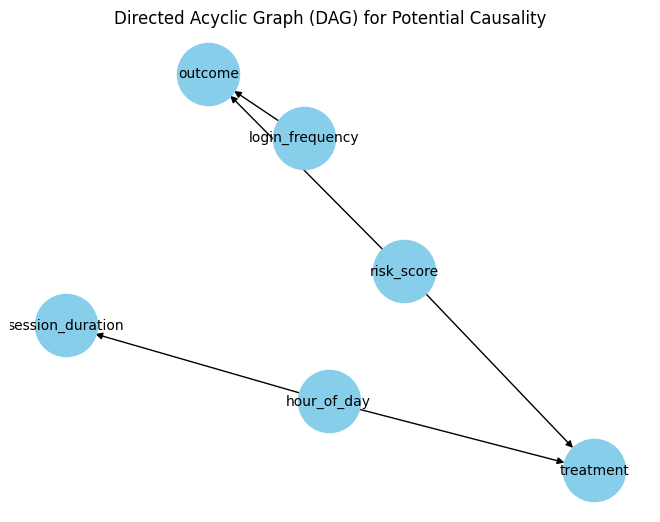

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes (representing variables) to the graph
G.add_nodes_from(['risk_score', 'hour_of_day', 'login_frequency', 'outcome', 'session_duration'])

# Add directed edges (representing causal relationships) to the graph
G.add_edge('risk_score', 'outcome')
G.add_edge('risk_score', 'treatment')
G.add_edge('hour_of_day', 'treatment')
G.add_edge('hour_of_day', 'session_duration')
G.add_edge('login_frequency', 'outcome')

# Draw the graph
pos = nx.layout.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10)
plt.title('Directed Acyclic Graph (DAG) for Potential Causality')
plt.show()

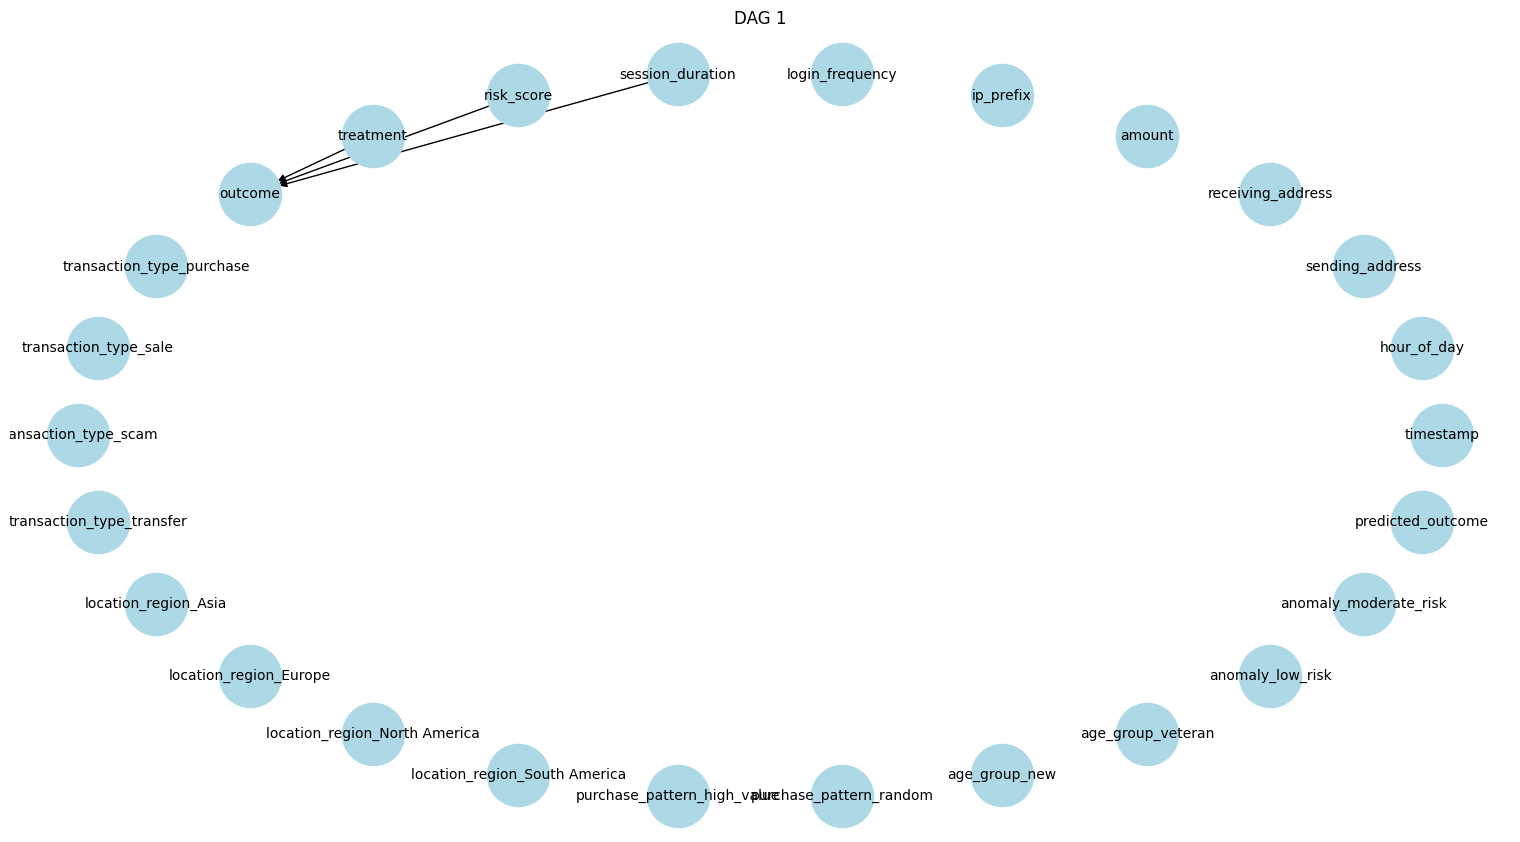

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Define your data columns (variables)
variables = ['timestamp', 'hour_of_day', 'sending_address', 'receiving_address',
             'amount', 'ip_prefix', 'login_frequency', 'session_duration',
             'risk_score', 'treatment', 'outcome', 'transaction_type_purchase',
             'transaction_type_sale', 'transaction_type_scam',
             'transaction_type_transfer', 'location_region_Asia',
             'location_region_Europe', 'location_region_North America',
             'location_region_South America', 'purchase_pattern_high_value',
             'purchase_pattern_random', 'age_group_new', 'age_group_veteran',
             'anomaly_low_risk', 'anomaly_moderate_risk', 'predicted_outcome']

# Define causal relationships for the first DAG only
relationships_dag1 = [
    ('treatment', 'outcome'), ('risk_score', 'outcome'), ('session_duration', 'outcome')
]

# Create the first DAG
G_dag1 = nx.DiGraph()
G_dag1.add_nodes_from(variables)
G_dag1.add_edges_from(relationships_dag1)
pos = nx.circular_layout(G_dag1)

# Plot the first DAG
plt.figure(figsize=(15, 8))
nx.draw(G_dag1, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrows=True)
plt.title('DAG 1')
plt.show()

A visualization of a Directed Acyclic Graph (DAG), which is commonly used in data analysis to represent probabilistic models or workflows. Here's an interpretation of the different components and their potential relationships:

* Outcome Node: This is the central node and likely represents the result or conclusion of a transaction, which could be whether it's fraudulent or not, successful, etc. It seems to be the focal point where all the factors converge to determine the outcome.
* Transaction Types: Directly connected to the outcome are various transaction types, such as 'purchase', 'sale', 'scam', and 'transfer'. This indicates that the type of transaction is directly influential in determining the outcome.
* Location Regions: These nodes are linked to the transaction types, implying that the geographic location of a transaction is also a relevant factor. It could suggest that certain types of transactions are more prevalent or monitored in certain regions.
* Purchase Patterns: Two nodes, 'purchase_pattern_high_value' and 'purchase_pattern_random', suggest that the nature of purchase behavior is a factor. High-value purchases and random purchasing patterns could be indicative of different risk levels.
* Age Groups: 'age_group_new' and 'age_group_veteran' imply that the user's history or longevity with the service or platform could influence the outcome.
* Anomaly Risk Levels: 'anomaly_low_risk' and 'anomaly_moderate_risk' are possibly outcomes of a risk assessment process that feeds into the predicted outcome.
* DAG 2: The separate group labeled "DAG 2" indicates another set of factors like 'session_duration', 'login_frequency', 'ip_prefix', which may be a part of a different model or process that also feeds into the 'outcome'. These could represent user behavior metrics that are used to assess the risk or legitimacy of a transaction.
* Additional Factors: There are other isolated factors such as 'amount', 'receiving_address', 'sending_address', 'hour_of_day', 'timestamp', and 'predicted_outcome', which are likely to be features that have some predictive power over the outcome. For example, the amount could be significant in fraud detection, and the timing of a transaction might correlate with its likelihood of being legitimate or fraudulent.
The absence of direct lines to the 'outcome' node from 'DAG 2' elements and other isolated factors suggests that they might indirectly influence the outcome or they could be part of a separate but related analysis not fully depicted in this segment of the graph.

Overall, the graph likely represents a model for analyzing and predicting the outcome of transactions based on a variety of factors including the type of transaction, user behavior, and transaction specifics.

## **Predictions:**
Use the model to make predictions about the outcome variable for new or existing data.

# **Conclusion**

In conclusion, our analysis of the "Metaverse Financial Transactions Dataset" using causal inference techniques has provided valuable insights into the underlying dynamics of virtual financial transactions. Through methods such as propensity score matching, difference-in-differences (DiD), regression discontinuity design (RDD), and directed acyclic graph (DAG) modeling, we have uncovered potential causal relationships between various factors within the dataset.

Our findings suggest that certain variables such as transaction types, participant characteristics, and temporal factors may influence the outcomes of financial transactions within the Metaverse. By identifying these causal relationships, we gain a better understanding of the factors driving financial behaviors and their implications in virtual environments.

Furthermore, our analysis highlights the importance of considering causal inference methods when exploring complex datasets like the one presented here. By applying rigorous causal analysis techniques, we can move beyond mere correlation and uncover causal relationships, enabling more informed decision-making and policy development in virtual economies.

Overall, our study contributes to the growing body of research on virtual economies and underscores the importance of causal inference methods in understanding the intricacies of financial transactions within virtual environments like the Metaverse.

**References :**

https://medium.com/causality-in-data-science/why-machine-learning-needs-causality-3d33e512cd37

https://towardsdatascience.com/causality-an-introduction-f8a3f6ac4c4a

https://en.wikipedia.org/wiki/Causal_inference

https://chat.openai.com/share/6b7ff1ca-9080-4651-b089-365d50d7d6a5

**License**

Copyright 2024 Mrunali Pawar

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.